In [23]:
# Popular imports, you may modify this if you need to add things

# For image processing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from skimage import color
from skimage import io
from skimage import data
from skimage.transform import resize
import os
from glob import glob
import os.path as path
from tqdm import tqdm
# path.join('','','') # could bfe list
# path.expanduser('root')

In [78]:
if not path.isdir('/home/aitrading/Desktop/GLTransform/GoodLooking'): 
    os.makedirs()
# f_path=path.expanduser('~/Desktop/GoodLooking')
f_path=path.expanduser('/home/aitrading/Desktop/GLTransform/GoodLooking')
out_path1=path.expanduser('/home/aitrading/Desktop/GLTransform/output/png/')
out_path2=path.expanduser('/home/aitrading/Desktop/GLTransform/output/npy/')
# out_path=path.expanduser('~/Desktop/GoodLooking/output')
jpg_files=glob(path.join(f_path,'*.jpg'))   # list

In [79]:
# img = io.imread('lena.png', as_gray=True)
for n in tqdm(range(len(png_files))):
    img_path=png_files[n]
    img_raw=io.imread(img_path)
    if len(img_raw.shape)==1:
        img_raw=img_raw[0]
    img = color.rgb2gray(img_raw)
    img_resized = resize(img, (512,512),anti_aliasing=False)
    img_rescaled = ((img_resized)*255).astype(np.uint8)
    np.save(out_path2+'img_np'+np.str(n), img_rescaled)
    io.imsave(out_path1+'img'+np.str(n)+'.png',img_rescaled)
#     io.imshow(img_rescaled,cmap='gray', vmin=0, vmax=255)
#     plt.show()










  0%|          | 0/1465 [00:00<?, ?it/s]








  0%|          | 1/1465 [00:00<11:28,  2.13it/s]








  0%|          | 2/1465 [00:00<11:38,  2.09it/s]








  0%|          | 3/1465 [00:01<11:27,  2.13it/s]








  0%|          | 4/1465 [00:01<10:07,  2.41it/s]








  0%|          | 6/1465 [00:02<08:10,  2.97it/s]








  0%|          | 7/1465 [00:02<07:34,  3.21it/s]








  1%|          | 9/1465 [00:02<06:35,  3.68it/s]








  1%|          | 10/1465 [00:03<07:37,  3.18it/s]








  1%|          | 11/1465 [00:03<08:50,  2.74it/s]








  1%|          | 12/1465 [00:04<10:21,  2.34it/s]








  1%|          | 13/1465 [00:04<08:00,  3.02it/s]








  1%|          | 14/1465 [00:04<09:00,  2.69it/s]








  1%|          | 15/1465 [00:05<09:52,  2.45it/s]








  1%|          | 16/1465 [00:05<10:34,  2.28it/s]








  1%|          | 17/1465 [00:06<10:15,  2.35it/s]








  1%|          | 18/1465 [00:06<09:29,  2.54it/s]








  1%|▏         | 19/1

  7%|▋         | 106/1465 [00:35<05:56,  3.81it/s]








  7%|▋         | 107/1465 [00:35<06:19,  3.58it/s]








  7%|▋         | 108/1465 [00:36<07:28,  3.02it/s]








  8%|▊         | 110/1465 [00:36<06:17,  3.59it/s]








  8%|▊         | 111/1465 [00:37<06:11,  3.64it/s]








  8%|▊         | 112/1465 [00:37<06:17,  3.58it/s]








  8%|▊         | 113/1465 [00:37<05:08,  4.38it/s]








  8%|▊         | 114/1465 [00:37<06:54,  3.26it/s]








  8%|▊         | 115/1465 [00:38<06:51,  3.28it/s]








  8%|▊         | 117/1465 [00:38<06:37,  3.40it/s]








  8%|▊         | 118/1465 [00:38<06:14,  3.60it/s]








  8%|▊         | 119/1465 [00:39<07:01,  3.19it/s]








  8%|▊         | 120/1465 [00:39<07:38,  2.93it/s]








  8%|▊         | 121/1465 [00:40<08:45,  2.56it/s]








  8%|▊         | 123/1465 [00:40<08:02,  2.78it/s]








  8%|▊         | 124/1465 [00:41<06:51,  3.26it/s]








  9%|▊         | 125/1465 [00:41<08:58,  2.49it/s]







 14%|█▍        | 212/1465 [01:12<06:17,  3.32it/s]








 15%|█▍        | 213/1465 [01:13<07:33,  2.76it/s]








 15%|█▍        | 214/1465 [01:13<07:31,  2.77it/s]








 15%|█▍        | 216/1465 [01:13<05:44,  3.63it/s]








 15%|█▍        | 218/1465 [01:14<05:24,  3.84it/s]








 15%|█▍        | 219/1465 [01:14<06:05,  3.41it/s]








 15%|█▌        | 220/1465 [01:14<06:44,  3.08it/s]








 15%|█▌        | 221/1465 [01:15<05:34,  3.72it/s]








 15%|█▌        | 222/1465 [01:15<06:19,  3.28it/s]








 15%|█▌        | 223/1465 [01:15<07:29,  2.76it/s]








 15%|█▌        | 224/1465 [01:16<07:43,  2.68it/s]








 15%|█▌        | 225/1465 [01:16<06:01,  3.43it/s]








 15%|█▌        | 226/1465 [01:16<05:40,  3.63it/s]








 15%|█▌        | 227/1465 [01:16<05:24,  3.81it/s]








 16%|█▌        | 229/1465 [01:17<05:16,  3.90it/s]








 16%|█▌        | 230/1465 [01:17<06:45,  3.05it/s]








 16%|█▌        | 231/1465 [01:18<08:09,  2.52it/s]







 22%|██▏       | 324/1465 [01:48<08:10,  2.33it/s]








 22%|██▏       | 325/1465 [01:48<08:34,  2.22it/s]








 22%|██▏       | 326/1465 [01:49<07:26,  2.55it/s]








 22%|██▏       | 327/1465 [01:49<05:55,  3.20it/s]








 22%|██▏       | 328/1465 [01:49<04:45,  3.99it/s]








 22%|██▏       | 329/1465 [01:49<06:05,  3.11it/s]








 23%|██▎       | 330/1465 [01:50<05:32,  3.41it/s]








 23%|██▎       | 331/1465 [01:50<06:32,  2.89it/s]








 23%|██▎       | 332/1465 [01:50<05:12,  3.62it/s]








 23%|██▎       | 333/1465 [01:50<04:13,  4.47it/s]








 23%|██▎       | 334/1465 [01:51<05:47,  3.26it/s]








 23%|██▎       | 335/1465 [01:51<04:58,  3.79it/s]








 23%|██▎       | 337/1465 [01:51<04:40,  4.02it/s]








 23%|██▎       | 338/1465 [01:52<06:22,  2.94it/s]








 23%|██▎       | 339/1465 [01:52<07:17,  2.57it/s]








 23%|██▎       | 340/1465 [01:53<07:13,  2.60it/s]








 23%|██▎       | 342/1465 [01:53<05:55,  3.16it/s]







 29%|██▉       | 428/1465 [02:23<06:19,  2.73it/s]








 29%|██▉       | 429/1465 [02:24<06:31,  2.65it/s]








 29%|██▉       | 430/1465 [02:24<06:39,  2.59it/s]








 29%|██▉       | 431/1465 [02:25<07:28,  2.31it/s]








 29%|██▉       | 432/1465 [02:25<05:46,  2.99it/s]








 30%|██▉       | 433/1465 [02:25<06:42,  2.56it/s]








 30%|██▉       | 434/1465 [02:26<05:49,  2.95it/s]








 30%|██▉       | 435/1465 [02:26<06:36,  2.60it/s]








 30%|██▉       | 436/1465 [02:26<06:19,  2.71it/s]








 30%|██▉       | 437/1465 [02:27<05:57,  2.87it/s]








 30%|██▉       | 438/1465 [02:27<05:15,  3.25it/s]








 30%|██▉       | 439/1465 [02:27<05:49,  2.93it/s]








 30%|███       | 440/1465 [02:28<05:33,  3.07it/s]








 30%|███       | 441/1465 [02:28<06:21,  2.69it/s]








 30%|███       | 442/1465 [02:28<05:40,  3.01it/s]








 30%|███       | 443/1465 [02:29<06:11,  2.75it/s]








 30%|███       | 444/1465 [02:29<05:24,  3.15it/s]







 36%|███▋      | 533/1465 [02:57<04:25,  3.51it/s]








 36%|███▋      | 534/1465 [02:57<05:05,  3.05it/s]








 37%|███▋      | 535/1465 [02:57<04:22,  3.54it/s]








 37%|███▋      | 536/1465 [02:58<04:16,  3.62it/s]








 37%|███▋      | 537/1465 [02:58<04:06,  3.77it/s]








 37%|███▋      | 538/1465 [02:58<05:10,  2.98it/s]








 37%|███▋      | 539/1465 [02:59<06:15,  2.47it/s]








 37%|███▋      | 540/1465 [02:59<05:23,  2.86it/s]








 37%|███▋      | 541/1465 [02:59<05:00,  3.08it/s]








 37%|███▋      | 542/1465 [03:00<05:14,  2.93it/s]








 37%|███▋      | 543/1465 [03:00<05:21,  2.87it/s]








 37%|███▋      | 544/1465 [03:01<06:29,  2.37it/s]








 37%|███▋      | 545/1465 [03:01<06:55,  2.21it/s]








 37%|███▋      | 546/1465 [03:01<05:22,  2.85it/s]








 37%|███▋      | 547/1465 [03:02<06:02,  2.53it/s]








 37%|███▋      | 548/1465 [03:02<04:44,  3.23it/s]








 37%|███▋      | 549/1465 [03:02<04:54,  3.11it/s]







 44%|████▎     | 638/1465 [03:32<04:50,  2.85it/s]








 44%|████▎     | 639/1465 [03:32<04:23,  3.13it/s]








 44%|████▎     | 640/1465 [03:33<05:16,  2.61it/s]








 44%|████▍     | 641/1465 [03:33<04:42,  2.91it/s]








 44%|████▍     | 642/1465 [03:33<04:57,  2.77it/s]








 44%|████▍     | 644/1465 [03:34<04:30,  3.04it/s]








 44%|████▍     | 645/1465 [03:34<03:39,  3.73it/s]








 44%|████▍     | 646/1465 [03:34<04:38,  2.94it/s]








 44%|████▍     | 647/1465 [03:35<03:40,  3.71it/s]








 44%|████▍     | 648/1465 [03:35<03:10,  4.28it/s]








 44%|████▍     | 649/1465 [03:35<03:42,  3.66it/s]








 44%|████▍     | 650/1465 [03:35<03:35,  3.79it/s]








 44%|████▍     | 651/1465 [03:36<04:43,  2.88it/s]








 45%|████▍     | 652/1465 [03:36<04:16,  3.18it/s]








 45%|████▍     | 653/1465 [03:37<05:05,  2.66it/s]








 45%|████▍     | 654/1465 [03:37<05:37,  2.41it/s]








 45%|████▍     | 655/1465 [03:37<05:20,  2.53it/s]







 51%|█████     | 741/1465 [04:06<05:09,  2.34it/s]








 51%|█████     | 742/1465 [04:07<05:29,  2.19it/s]








 51%|█████     | 743/1465 [04:08<08:07,  1.48it/s]








 51%|█████     | 744/1465 [04:09<07:27,  1.61it/s]








 51%|█████     | 746/1465 [04:09<05:44,  2.09it/s]








 51%|█████     | 747/1465 [04:09<05:52,  2.04it/s]








 51%|█████     | 748/1465 [04:10<05:32,  2.16it/s]








 51%|█████     | 749/1465 [04:10<05:43,  2.08it/s]








 51%|█████     | 750/1465 [04:11<05:46,  2.06it/s]








 51%|█████▏    | 751/1465 [04:11<05:20,  2.23it/s]








 51%|█████▏    | 752/1465 [04:12<06:05,  1.95it/s]








 51%|█████▏    | 753/1465 [04:12<06:07,  1.94it/s]








 51%|█████▏    | 754/1465 [04:12<04:38,  2.55it/s]








 52%|█████▏    | 755/1465 [04:13<05:04,  2.33it/s]








 52%|█████▏    | 756/1465 [04:14<05:44,  2.06it/s]








 52%|█████▏    | 757/1465 [04:14<06:12,  1.90it/s]








 52%|█████▏    | 758/1465 [04:15<06:12,  1.90it/s]







 58%|█████▊    | 845/1465 [04:42<02:57,  3.50it/s]








 58%|█████▊    | 846/1465 [04:43<02:54,  3.54it/s]








 58%|█████▊    | 847/1465 [04:43<02:24,  4.28it/s]








 58%|█████▊    | 848/1465 [04:43<02:24,  4.26it/s]








 58%|█████▊    | 849/1465 [04:43<03:11,  3.22it/s]








 58%|█████▊    | 850/1465 [04:44<03:50,  2.66it/s]








 58%|█████▊    | 851/1465 [04:45<04:16,  2.39it/s]








 58%|█████▊    | 852/1465 [04:45<03:52,  2.64it/s]








 58%|█████▊    | 854/1465 [04:45<02:58,  3.42it/s]








 58%|█████▊    | 855/1465 [04:45<03:29,  2.91it/s]








 58%|█████▊    | 856/1465 [04:46<04:01,  2.52it/s]








 58%|█████▊    | 857/1465 [04:46<03:51,  2.63it/s]








 59%|█████▊    | 858/1465 [04:47<04:14,  2.39it/s]








 59%|█████▊    | 859/1465 [04:47<04:35,  2.20it/s]








 59%|█████▊    | 860/1465 [04:48<03:56,  2.56it/s]








 59%|█████▉    | 861/1465 [04:48<04:19,  2.33it/s]








 59%|█████▉    | 863/1465 [04:48<03:15,  3.07it/s]







 65%|██████▍   | 949/1465 [05:20<02:31,  3.41it/s]








 65%|██████▍   | 950/1465 [05:21<03:03,  2.81it/s]








 65%|██████▍   | 951/1465 [05:21<03:29,  2.45it/s]








 65%|██████▌   | 953/1465 [05:22<03:05,  2.76it/s]








 65%|██████▌   | 954/1465 [05:22<03:27,  2.46it/s]








 65%|██████▌   | 955/1465 [05:23<03:11,  2.67it/s]








 65%|██████▌   | 956/1465 [05:23<03:29,  2.43it/s]








 65%|██████▌   | 958/1465 [05:24<03:02,  2.78it/s]








 66%|██████▌   | 960/1465 [05:24<02:32,  3.31it/s]








 66%|██████▌   | 961/1465 [05:24<02:36,  3.22it/s]








 66%|██████▌   | 963/1465 [05:25<02:36,  3.21it/s]








 66%|██████▌   | 964/1465 [05:25<02:20,  3.57it/s]








 66%|██████▌   | 965/1465 [05:25<02:06,  3.95it/s]








 66%|██████▌   | 966/1465 [05:25<01:44,  4.80it/s]








 66%|██████▌   | 967/1465 [05:26<02:32,  3.27it/s]








 66%|██████▌   | 968/1465 [05:27<04:39,  1.78it/s]








 66%|██████▌   | 969/1465 [05:27<04:24,  1.87it/s]







 72%|███████▏  | 1053/1465 [05:57<02:55,  2.34it/s]








 72%|███████▏  | 1054/1465 [05:58<03:04,  2.22it/s]








 72%|███████▏  | 1055/1465 [05:58<02:54,  2.35it/s]








 72%|███████▏  | 1057/1465 [05:58<02:10,  3.13it/s]








 72%|███████▏  | 1058/1465 [05:59<02:38,  2.57it/s]








 72%|███████▏  | 1059/1465 [05:59<02:05,  3.23it/s]








 72%|███████▏  | 1060/1465 [05:59<02:09,  3.13it/s]








 72%|███████▏  | 1061/1465 [05:59<02:07,  3.17it/s]








 72%|███████▏  | 1062/1465 [06:00<01:57,  3.44it/s]








 73%|███████▎  | 1063/1465 [06:00<02:14,  2.99it/s]








 73%|███████▎  | 1064/1465 [06:01<02:34,  2.60it/s]








 73%|███████▎  | 1065/1465 [06:01<02:02,  3.26it/s]








 73%|███████▎  | 1066/1465 [06:01<02:23,  2.77it/s]








 73%|███████▎  | 1067/1465 [06:02<02:26,  2.71it/s]








 73%|███████▎  | 1069/1465 [06:02<01:50,  3.58it/s]








 73%|███████▎  | 1070/1465 [06:02<01:58,  3.32it/s]








 73%|███████▎  | 1071/1465 [06:02<02:00,

 79%|███████▉  | 1160/1465 [06:34<01:58,  2.58it/s]








 79%|███████▉  | 1161/1465 [06:35<01:49,  2.78it/s]








 79%|███████▉  | 1162/1465 [06:35<01:58,  2.56it/s]








 79%|███████▉  | 1163/1465 [06:35<01:53,  2.66it/s]








 79%|███████▉  | 1164/1465 [06:36<01:45,  2.85it/s]








 80%|███████▉  | 1165/1465 [06:36<01:59,  2.51it/s]








 80%|███████▉  | 1166/1465 [06:36<01:56,  2.57it/s]








 80%|███████▉  | 1167/1465 [06:37<01:31,  3.25it/s]








 80%|███████▉  | 1168/1465 [06:37<01:15,  3.95it/s]








 80%|███████▉  | 1169/1465 [06:37<01:35,  3.10it/s]








 80%|███████▉  | 1170/1465 [06:38<01:39,  2.96it/s]








 80%|███████▉  | 1171/1465 [06:38<01:55,  2.54it/s]








 80%|████████  | 1172/1465 [06:39<02:05,  2.34it/s]








 80%|████████  | 1173/1465 [06:39<02:32,  1.92it/s]








 80%|████████  | 1174/1465 [06:40<02:21,  2.06it/s]








 80%|████████  | 1175/1465 [06:40<02:18,  2.09it/s]








 80%|████████  | 1176/1465 [06:40<01:58,

 86%|████████▌ | 1262/1465 [07:11<00:58,  3.46it/s]








 86%|████████▌ | 1263/1465 [07:11<00:55,  3.66it/s]








 86%|████████▋ | 1264/1465 [07:12<00:54,  3.66it/s]








 86%|████████▋ | 1265/1465 [07:12<01:08,  2.92it/s]








 86%|████████▋ | 1267/1465 [07:13<01:07,  2.94it/s]








 87%|████████▋ | 1268/1465 [07:13<01:12,  2.72it/s]








 87%|████████▋ | 1269/1465 [07:13<00:58,  3.37it/s]








 87%|████████▋ | 1270/1465 [07:14<01:02,  3.11it/s]








 87%|████████▋ | 1271/1465 [07:14<01:11,  2.70it/s]








 87%|████████▋ | 1272/1465 [07:15<01:19,  2.43it/s]








 87%|████████▋ | 1273/1465 [07:15<01:01,  3.11it/s]








 87%|████████▋ | 1275/1465 [07:15<00:47,  3.99it/s]








 87%|████████▋ | 1276/1465 [07:15<00:59,  3.17it/s]








 87%|████████▋ | 1277/1465 [07:16<01:12,  2.60it/s]








 87%|████████▋ | 1278/1465 [07:16<00:57,  3.24it/s]








 87%|████████▋ | 1279/1465 [07:17<01:06,  2.78it/s]








 87%|████████▋ | 1280/1465 [07:17<01:09,

 93%|█████████▎| 1367/1465 [07:47<00:37,  2.63it/s]








 93%|█████████▎| 1368/1465 [07:47<00:32,  2.98it/s]








 93%|█████████▎| 1369/1465 [07:47<00:43,  2.21it/s]








 94%|█████████▎| 1370/1465 [07:48<00:43,  2.17it/s]








 94%|█████████▎| 1371/1465 [07:48<00:36,  2.58it/s]








 94%|█████████▎| 1373/1465 [07:49<00:32,  2.83it/s]








 94%|█████████▍| 1374/1465 [07:49<00:30,  2.94it/s]








 94%|█████████▍| 1375/1465 [07:49<00:24,  3.69it/s]








 94%|█████████▍| 1376/1465 [07:50<00:29,  3.03it/s]








 94%|█████████▍| 1377/1465 [07:50<00:29,  3.01it/s]








 94%|█████████▍| 1378/1465 [07:50<00:33,  2.60it/s]








 94%|█████████▍| 1379/1465 [07:51<00:31,  2.73it/s]








 94%|█████████▍| 1380/1465 [07:51<00:33,  2.50it/s]








 94%|█████████▍| 1381/1465 [07:51<00:27,  3.04it/s]








 94%|█████████▍| 1382/1465 [07:52<00:22,  3.69it/s]








 94%|█████████▍| 1383/1465 [07:52<00:25,  3.28it/s]








 94%|█████████▍| 1384/1465 [07:52<00:29,

In [56]:
img_path

'/home/aitrading/Desktop/GLTransform/GoodLooking/IMG_8564.jpg'

In [63]:
img2 = io.imread(img_path)

In [77]:
a=img2.shape
len(a)

1

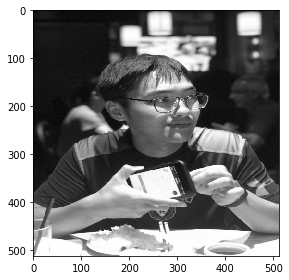

In [66]:
img = color.rgb2gray(img2[0])
img_resized = resize(img, (512,512),anti_aliasing=False)
img_rescaled = ((img_resized)*255).astype(np.uint8)
io.imshow(img_rescaled)
plt.show()

In [65]:
img = color.rgb2gray(img2[1])
img_resized = resize(img, (512,512),anti_aliasing=False)
img_rescaled = ((img_resized)*255).astype(np.uint8)
io.imshow(img_rescaled)
plt.show()

IndexError: too many indices for array

In [80]:
out_path2=path.expanduser('/home/aitrading/Desktop/GLTransform/output/npy/')
np_files=glob(path.join(out_path2,'*.npy'))   # list
for i,data in enumerate(np_files):
    data=np.load(data)

array([[ 5,  5,  7, ..., 32, 32, 32],
       [ 5,  6,  8, ..., 30, 35, 32],
       [ 4,  6,  7, ..., 30, 33, 29],
       ...,
       [ 7, 12, 12, ..., 38, 36, 43],
       [ 9,  9,  9, ..., 41, 35, 44],
       [ 8, 10,  7, ..., 46, 38, 42]], dtype=uint8)